# Data set

In [3]:
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim
import pickle
import scipy.io

In [5]:
def load_image_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data = [float(value) for line in lines[6:] for value in line.split()]
    return np.array(data).reshape([256, 256]) if '256' in file_path else np.array(data).reshape([64, 64])

def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Define paths to folders containing LR and HR images

lr_folders = [
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64\Line_40x40_64',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64\Line_30x30_64',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64\Line_20x20_64',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64\Line_10x10_64',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64\circle_island_30x30_64',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64\circle_island_20x20_64',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64\circle_island_15x15_64',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64\circle_island_10x10_64',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64\circle_hole_30x30_64',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64\circle_hole_20x20_64',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64\circle_hole_15x15_64',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64\circle_hole_10x10_64',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64_BWD\Line_40x40_64_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64_BWD\Line_30x30_64_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64_BWD\Line_20x20_64_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64_BWD\Line_10x10_64_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64_BWD\circle_island_30x30_64_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64_BWD\circle_island_20x20_64_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64_BWD\circle_island_15x15_64_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64_BWD\circle_island_10x10_64_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64_BWD\circle_hole_30x30_64_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64_BWD\circle_hole_20x20_64_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64_BWD\circle_hole_15x15_64_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Input_64x64_BWD\circle_hole_10x10_64_BWD',
]

hr_folders = [
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256\Line_40x40_256',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256\Line_30x30_256',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256\Line_20x20_256',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256\Line_10x10_256',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256\circle_island_30x30_256',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256\circle_island_20x20_256',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256\circle_island_15x15_256',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256\circle_island_10x10_256',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256\circle_hole_30x30_256',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256\circle_hole_20x20_256',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256\circle_hole_15x15_256',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256\circle_hole_10x10_256',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256_BWD\Line_40x40_256_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256_BWD\Line_30x30_256_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256_BWD\Line_20x20_256_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256_BWD\Line_10x10_256_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256_BWD\circle_island_30x30_256_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256_BWD\circle_island_20x20_256_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256_BWD\circle_island_15x15_256_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256_BWD\circle_island_10x10_256_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256_BWD\circle_hole_30x30_256_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256_BWD\circle_hole_20x20_256_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256_BWD\circle_hole_15x15_256_BWD',
    r'C:\Users\MMIL\JT_FASTSCAN\Text Export\Output_256x256_BWD\circle_hole_10x10_256_BWD',
]

# Load and normalize images from specified folders.
def load_images_from_folders(lr_folders, hr_folders):
    lr_images, hr_images = [], []
    for lr_folder, hr_folder in zip(lr_folders, hr_folders):
        lr_files = glob.glob(os.path.join(lr_folder, '*.txt'))
        hr_files = [f.replace(lr_folder, hr_folder) for f in lr_files]
        
        lr_images.extend([normalize_data(load_image_data(f)) for f in lr_files])
        hr_images.extend([normalize_data(load_image_data(f)) for f in hr_files])
    
    return np.array(lr_images), np.array(hr_images)

In [6]:
lr_images, hr_images = load_images_from_folders(lr_folders, hr_folders)
# Preprocess and split dataset
lr_train, lr_test, hr_train, hr_test = train_test_split(lr_images, hr_images, test_size=0.2, random_state=42)

# Check the size of training and testing datasets
print(f"Training LR Images: {lr_train.shape}, Training HR Images: {hr_train.shape}")
print(f"Testing LR Images: {lr_test.shape}, Testing HR Images: {hr_test.shape}")

Training LR Images: (104, 64, 64), Training HR Images: (104, 256, 256)
Testing LR Images: (26, 64, 64), Testing HR Images: (26, 256, 256)


In [7]:
# Save this data in to .mat or .h5

#1. imges_64_input.mat or .h5
#2. imges_256_output.mat or .h5

import numpy as np
from scipy.io import savemat

# Generate some sample data with shape (6, 64, 64)
data_low = lr_images
data_high = hr_images

# Save the data to a MATLAB file
savemat(r'C:\Users\MMIL\JT_FASTSCAN\test_data_low.mat', {'test_data_low': data_low})
savemat(r'C:\Users\MMIL\JT_FASTSCAN\test_data_high.mat', {'test_data_high': data_high})

#ML

(130, 64, 64)
(130, 256, 256)
(780, 64, 64)
(780, 256, 256)
(780, 64, 64)
(780, 256, 256)


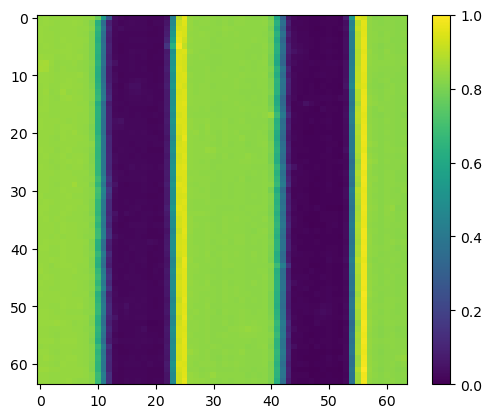

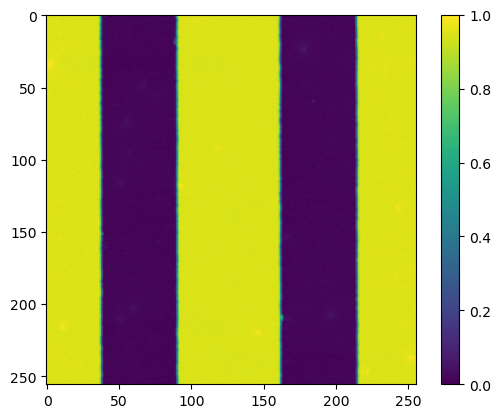

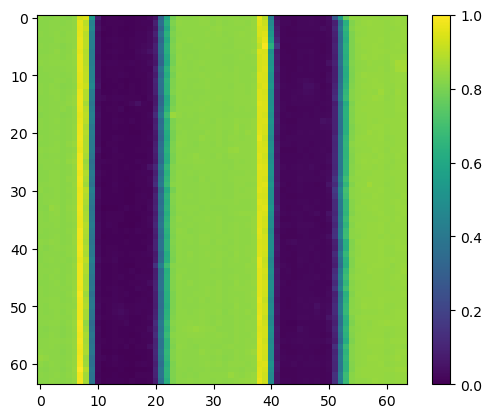

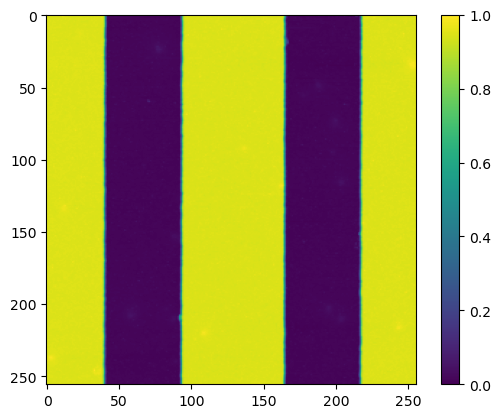

In [8]:
#download
from scipy.io import loadmat
from scipy.ndimage import rotate

# Load the MATLAB file
mat_data_data_low = loadmat(r'C:\Users\MMIL\JT_FASTSCAN\test_data_low.mat')
mat_data_data_high = loadmat(r'C:\Users\MMIL\JT_FASTSCAN\test_data_high.mat')
# Access the data array
data_low_ori = mat_data_data_low['test_data_low']
data_high_ori = mat_data_data_high['test_data_high']

data_low = mat_data_data_low['test_data_low']
data_high = mat_data_data_high['test_data_high']

# Now you can use 'data' array in your Python code
print(data_low.shape)  # Print the shape of the data array
print(data_high.shape)  # Print the shape of the data array

# 기존에 주어진 코드
flipped_low_res_images = np.flip(data_low, axis=2)  # 가로축을 기준으로 뒤집기
flipped_high_res_images = np.flip(data_high, axis=2)  # 가로축을 기준으로 뒤집기
data_low = np.append(data_low, flipped_low_res_images, axis=0)
data_high = np.append(data_high, flipped_high_res_images, axis=0)

# 세로축을 기준으로 뒤집기
flipped_vertically_low_res = np.flip(data_low, axis=0)
flipped_vertically_high_res = np.flip(data_high, axis=0)

# 가로축과 세로축 모두를 기준으로 뒤집기
flipped_both_low_res = np.flip(data_low, axis=(0, 2))
flipped_both_high_res = np.flip(data_high, axis=(0, 2))

# 뒤집은 데이터를 기존 데이터에 추가
data_low = np.append(data_low, flipped_vertically_low_res, axis=0)
data_low = np.append(data_low, flipped_both_low_res, axis=0)
data_high = np.append(data_high, flipped_vertically_high_res, axis=0)
data_high = np.append(data_high, flipped_both_high_res, axis=0)

# Now you can use 'data' array in your Python code
print(data_low.shape)  # Print the shape of the data array
print(data_high.shape)  # Print the shape of the data array

def rot_image(images, deg = 45):

    for num in range(np.shape(images)[0]):  # Iterate through each 2D slice
        # Rotate the image by 45 degrees, allowing reshape
        image = images[num, :, :]
        rotated_image = rotate(image, deg, reshape=False, mode='nearest')
        images[num, :, :] = rotated_image
    
    return images

data_low_fl = data_low
data_high_fl = data_high

################################################# Rot
# data_low_rot_20 = rot_image(data_low_fl, deg = 20)
# data_high_rot_20 = rot_image(data_high_fl, deg = 20)

# data_low = np.append(data_low, data_low_rot_20, axis=0)
# data_high = np.append(data_high, data_high_rot_20, axis=0)

# data_low_rot_40 = rot_image(data_low_fl, deg = 40)
# data_high_rot_40 = rot_image(data_high_fl, deg = 40)

# data_low = np.append(data_low, data_low_rot_40, axis=0)
# data_high = np.append(data_high, data_high_rot_40, axis=0)

# data_low_rot_60 = rot_image(data_low_fl, deg = 60)
# data_high_rot_60 = rot_image(data_high_fl, deg = 60)

# data_low = np.append(data_low, data_low_rot_60, axis=0)
# data_high = np.append(data_high, data_high_rot_60, axis=0)

# data_low_rot_80 = rot_image(data_low_fl, deg = 80)
# data_high_rot_80 = rot_image(data_high_fl, deg = 80)

# data_low = np.append(data_low, data_low_rot_80, axis=0)
# data_high = np.append(data_high, data_high_rot_80, axis=0)


# ########################################## add noise
# # 
# level = 0.05

# np.random.RandomState(seed=42)
# noise_low = np.random.rand(650, 64, 64)*level  # Example 3D array
# noise_high = np.random.rand(650, 256, 256)*level  # Example 3D array

# data_low_wnoise = data_low + noise_low
# data_high_wnoise = data_high + noise_high

# data_low = np.append(data_low, data_low_wnoise, axis=0)
# data_high = np.append(data_high, data_high_wnoise, axis=0)


# Now you can use 'data' array in your Python code
print(data_low.shape)  # Print the shape of the data array
print(data_high.shape)  # Print the shape of the data array

num = 10

plt.imshow(np.squeeze(data_low[num,:,:]))
plt.colorbar()
plt.show()
plt.imshow(np.squeeze(data_high[num,:,:]))
plt.colorbar()
plt.show()

plt.imshow(np.squeeze(flipped_low_res_images[num,:,:]))
plt.colorbar()
plt.show()
plt.imshow(np.squeeze(flipped_high_res_images[num,:,:]))
plt.colorbar()
plt.show()

# plt.imshow(np.squeeze(data_low[num,:,:]) + np.squeeze(noise_low[num,:,:]))
# plt.colorbar()
# plt.show()
# plt.imshow(np.squeeze(data_high[num,:,:])+ np.squeeze(noise_high[num,:,:]))
# plt.colorbar()
# plt.show()

In [9]:
# Preprocess and split dataset
lr_train, lr_test, hr_train, hr_test = train_test_split(data_low, data_high, test_size=0.2, random_state=42)

# Check the size of training and testing datasets
print(f"Training LR Images: {lr_train.shape}, Training HR Images: {hr_train.shape}")
print(f"Testing LR Images: {lr_test.shape}, Testing HR Images: {hr_test.shape}")

Training LR Images: (624, 64, 64), Training HR Images: (624, 256, 256)
Testing LR Images: (156, 64, 64), Testing HR Images: (156, 256, 256)


### Image Test(random 5)

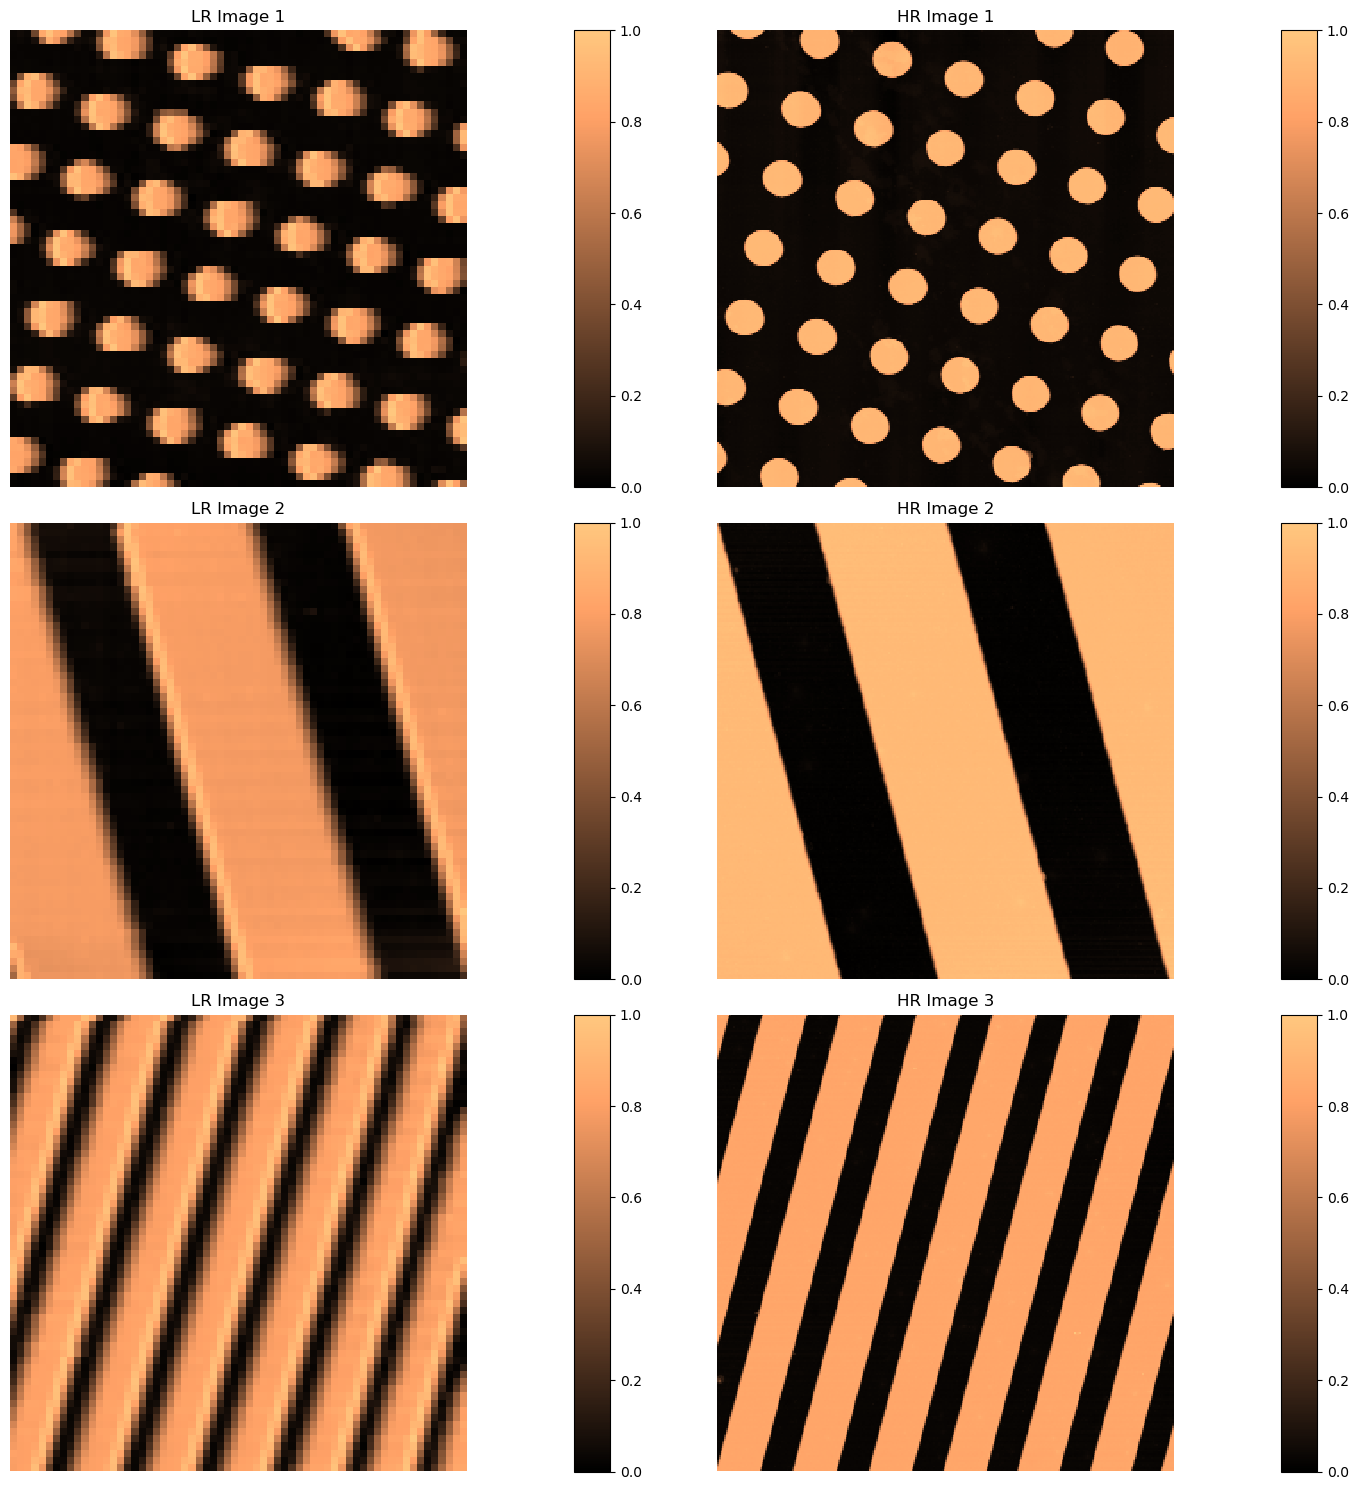

In [10]:
#Visualize LR and HR images with color maps and color bars.
def show_images_with_colormap_and_colorbars(lr_images, hr_images, num_samples=3):
    fig, axs = plt.subplots(num_samples, 4, figsize=(15, 5 * num_samples), 
                            gridspec_kw={'width_ratios': [1, 0.05, 1, 0.05]})
    
    for i in range(num_samples):
        # Visualize LR image
        lr_im = axs[i, 0].imshow(lr_images[i], cmap='copper', interpolation='nearest')
        axs[i, 0].set_title(f'LR Image {i+1}')
        axs[i, 0].axis('off')
        fig.colorbar(lr_im, cax=axs[i, 1], orientation='vertical')
        axs[i, 1].axis('on')
        
        # Visualize HR image
        hr_im = axs[i, 2].imshow(hr_images[i], cmap='copper', interpolation='nearest')
        axs[i, 2].set_title(f'HR Image {i+1}')
        axs[i, 2].axis('off')
        fig.colorbar(hr_im, cax=axs[i, 3], orientation='vertical')
        axs[i, 3].axis('on')
    
    plt.tight_layout()
    plt.show()

# Example function call (lr_train and hr_train are previously loaded training datasets)
show_images_with_colormap_and_colorbars(lr_train, hr_train, num_samples=3)


# Model

In [15]:
# Create a model architecture for super-resolution with specified dropout rate.
def create_model(dropout_rate=0.2):
    input_img = tf.keras.Input(shape=(64, 64, 1))

    # Encoder
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    # x = tf.keras.layers.GaussianNoise(0.05)(x)  # Add Gaussian noise again after another layer
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    
    encoded = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(encoded)
    #x = tf.keras.layers.GaussianNoise(0.05)(x)  # Add Gaussian noise again after another layer
    x = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Conv2DTranspose(1, (3, 3), strides=4, activation='relu', padding='same')(x)  # 스트라이드 변경
    decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)

    autoencoder = tf.keras.Model(input_img, decoded)
    #autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='mae', metrics=['accuracy']) #this is good
    # autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), loss='mae', metrics=['accuracy']) #this is good
    
    # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    #     initial_learning_rate=0.0001,
    #     decay_steps=1,
    #     decay_rate=0.001)

    # opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum = 0.8)

    # autoencoder.compile(optimizer=opt, loss='mae', metrics=['accuracy'])
    
    autoencoder.compile(optimizer='adam', loss='mae', metrics=['accuracy']) # check 

    return autoencoder

# Create and summarize the model
autoencoder = create_model()
autoencoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 256)       2560      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       295040    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        7379

# Train

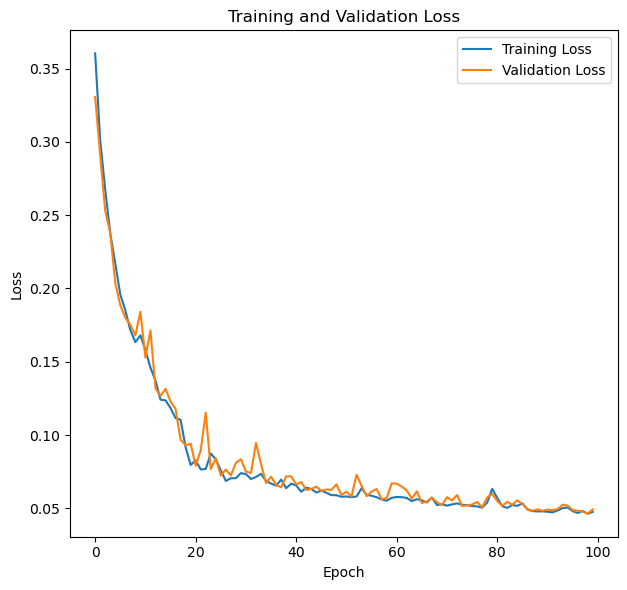

In [ ]:
#0730 test
#Load only the weights of your model
autoencoder.load_weights(r'C:\Users\MMIL\JT_FASTSCAN\model_weight\model_v9a_240811.h5')

with open(r'C:\Users\MMIL\JT_FASTSCAN\model_weight\model_v9a_240811_history.pkl', 'rb') as file:
    history = pickle.load(file)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# # Training accuracy (here we use mae, so accuracy is shown instead)
# plt.subplot(1, 2, 2)
# plt.plot(history['accuracy'], label='Training Accuracy')
# plt.plot(history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

plt.tight_layout()
plt.show()



In [34]:
# # Prepare the data (using previously prepared lr_train, hr_train datasets)
# # lr_train: Low Resolution image dataset
# # hr_train: High Resolution image dataset

# # Set training parameters
# # epochs = 50 #this is good
# epochs = 100
# batch_size = 8

# # Split the dataset into training and validation sets
# from sklearn.model_selection import train_test_split

# lr_train, lr_val, hr_train, hr_val = train_test_split(lr_train, hr_train, test_size=0.2, random_state=42)


# # Train the model
# history = autoencoder.fit(
#     x=lr_train, 
#     y=hr_train, 
#     epochs=epochs, 
#     batch_size=batch_size, 
#     validation_data=(lr_val, hr_val),
#     shuffle=True
# )

# # Visualize the training process (loss and accuracy)


# plt.figure(figsize=(12, 6))

# # Training loss
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# # Training accuracy (here we use mae, so accuracy is shown instead)
# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()


# TEST 

### Model test

5/5 [==============================] - 0s 78ms/step
Average PSNR: 21.49, Average SSIM: 0.7949
1/1 [==============================] - 0s 20ms/step


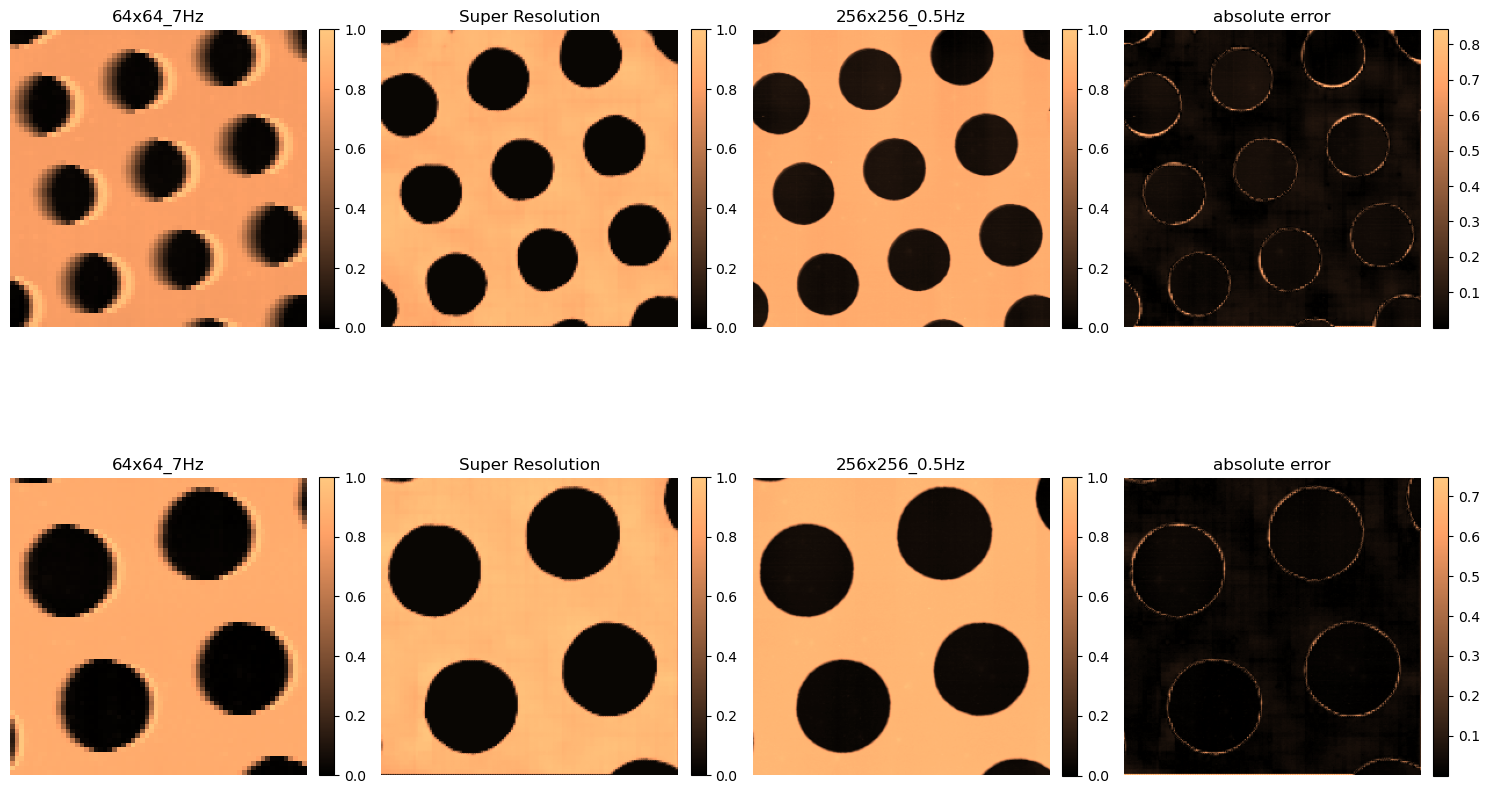

Number of samples in test dataset: 156


In [35]:
def evaluate_model(model, lr_images, hr_images):
    # Predict and evaluate the model using PSNR and SSIM metrics.
    predicted_images = model.predict(lr_images)

    psnr_values = []
    ssim_values = []

    for i in range(len(hr_images)):
        # Adjust dimensions
        hr_image = np.squeeze(hr_images[i])
        predicted_image = np.squeeze(predicted_images[i])

        # Calculate PSNR and SSIM
        psnr = compare_psnr(hr_image, predicted_image, data_range=hr_image.max() - hr_image.min())
        ssim = compare_ssim(hr_image, predicted_image, data_range=predicted_image.max() - predicted_image.min())

        psnr_values.append(psnr)
        ssim_values.append(ssim)

    # Calculate average PSNR and SSIM values
    avg_psnr = np.mean(psnr_values)
    avg_ssim = np.mean(ssim_values)

    return avg_psnr, avg_ssim

# Evaluate the model
avg_psnr, avg_ssim = evaluate_model(autoencoder, lr_test, hr_test)
print(f'Average PSNR: {avg_psnr:.2f}, Average SSIM: {avg_ssim:.4f}')

# Visualize prediction results
def visualize_predictions(lr_images, hr_images, model, num_samples=5):

    input_to_pred = lr_images[:num_samples]

    scipy.io.savemat(r'C:\Users\MMIL\JT_FASTSCAN\prediction\input_to_pred.mat', {'input_to_pred': input_to_pred})

    predictions = model.predict(lr_images[:num_samples])
    fig, axs = plt.subplots(num_samples, 4, figsize=(15, 5 * num_samples))
    
    for i in range(num_samples):
        # Low Resolution image
        im = axs[i, 0].imshow(np.squeeze(lr_images[i]), cmap='copper')
        axs[i, 0].set_title('64x64_7Hz')
        axs[i, 0].axis('off')
        fig.colorbar(im, ax=axs[i, 0], fraction=0.046, pad=0.04)

        # Model Prediction (Super Resolution)
        not_norm = 0
        if not_norm == 1:
            im = axs[i, 1].imshow(np.squeeze(predictions[i]), cmap='copper')
            axs[i, 1].set_title('Super Resolution')
            axs[i, 1].axis('off')
            fig.colorbar(im, ax=axs[i, 1], fraction=0.046, pad=0.04)
        else:
            # Model Prediction (Super Resolution) 표시, 값의 범위를 0에서 1로 제한
            im = axs[i, 1].imshow(np.squeeze(predictions[i]), cmap='copper', vmin=0, vmax=1)
            axs[i, 1].set_title('Super Resolution')
            axs[i, 1].axis('off')
            # 이 이미지에 대한 Colorbar 추가
            fig.colorbar(im, ax=axs[i, 1], fraction=0.046, pad=0.04)


        # Ground Truth (High Resolution)
        im = axs[i, 2].imshow(np.squeeze(hr_images[i]), cmap='copper')
        axs[i, 2].set_title('256x256_0.5Hz')
        axs[i, 2].axis('off')
        fig.colorbar(im, ax=axs[i, 2], fraction=0.046, pad=0.04)

        # abs(Ground Truth (High Resolution) - Model Prediction (Super Resolution))
        im = axs[i, 3].imshow(np.abs(np.squeeze(hr_images[i]) - np.squeeze(predictions[i])), cmap='copper')
        axs[i, 3].set_title('absolute error')
        axs[i, 3].axis('off')
        fig.colorbar(im, ax=axs[i, 3], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

    return predictions

# Call visualization function
predictions = visualize_predictions(lr_test, hr_test, autoencoder, num_samples=2)

print(f"Number of samples in test dataset: {len(lr_test)}")

import scipy.io

# .mat 파일로 저장
scipy.io.savemat(r'C:\Users\MMIL\JT_FASTSCAN\prediction\DNN_predictions.mat', {'predictions': predictions})


In [36]:
predictions_DNN = predictions
savemat(r'C:\Users\MMIL\JT_FASTSCAN\predictions_DNN.mat', {'predictions_DNN': predictions_DNN})

lr_images_DNN = lr_test
savemat(r'C:\Users\MMIL\JT_FASTSCAN\lr_images_DNN.mat', {'lr_images_DNN': lr_images_DNN})

# Load the .mat file
predictions_DNN_load = loadmat(r'C:\Users\MMIL\JT_FASTSCAN\predictions_DNN.mat')["predictions_DNN"]

lr_images_DNN = loadmat(r'C:\Users\MMIL\JT_FASTSCAN\lr_images_DNN.mat')["lr_images_DNN"]

(156, 64, 64)


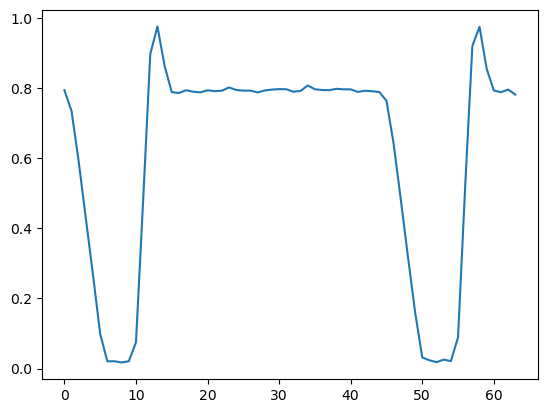

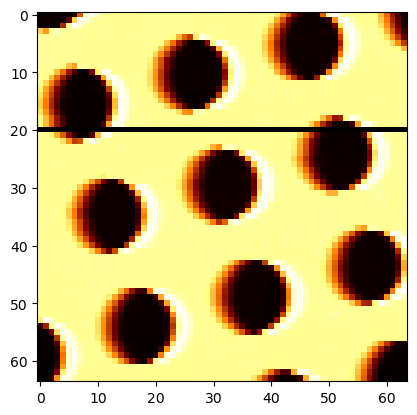

In [37]:
import matplotlib.pyplot as plt


print(np.shape(lr_images_DNN)) # your images matrix

im_num = 0
x_index = 20

# y cut
line_profile = lr_images_DNN[im_num, x_index, :]
plt.plot(line_profile)
plt.show()

#see where the line was taken from
lr_images_resized_marked = lr_images_DNN# to make marker
lr_images_resized_marked[im_num, x_index, :] = 0
plt.imshow(lr_images_resized_marked[im_num, :, :], cmap='afmhot')
plt.show()

(2, 256, 256, 1)


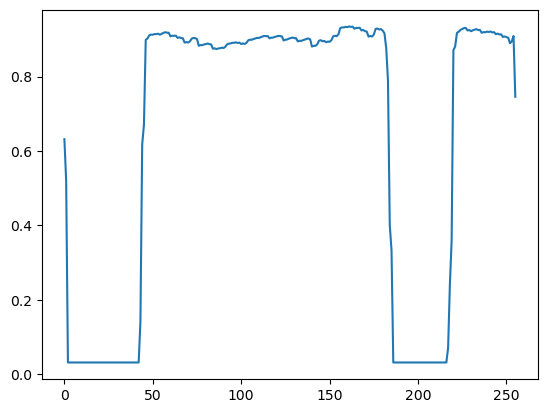

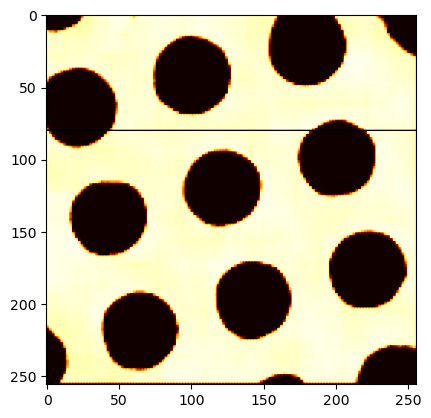

In [38]:
import matplotlib.pyplot as plt

print(np.shape(predictions_DNN_load)) # your images matrix

im_num = 0
x_index = 80

# y cut
line_profile = predictions_DNN_load[im_num, x_index, :, 0]
plt.plot(line_profile)
plt.show()

#see where the line was taken from
lr_images_resized_marked = predictions_DNN_load# to make marker
lr_images_resized_marked[im_num, x_index, :, 0] = 0
plt.imshow(lr_images_resized_marked[im_num, :, :, 0], cmap='afmhot')
plt.show()

In [39]:
it_good = 0
if it_good ==1:

    import pickle
    #Save only the weights of your model
    autoencoder.save_weights(r'C:\Users\MMIL\JT_FASTSCAN\model_weight\model_v9a_240812.h5')

    #Save the history to a file
    with open(r'C:\Users\MMIL\JT_FASTSCAN\model_weight\model_v9a_240812_history.pkl', 'wb') as file:
        pickle.dump(history.history, file)